# Prática Independente: Regularização.

#### Nessa prática, vamos exercitar a regularização. O [conjunto de dados](http://data.princeton.edu/wws509/datasets/#salary) consiste em dados salariais de 52 professores de uma pequena universidade, categorizados por:

- sx = Sex, coded 1 for female and 0 for male
- `rk` = Rank, coded
- `1` for assistant professor,
- `2` for associate professor, and
- `3` for full professor
- `yr` = Number of years in current rank
- `dg` = Highest degree, coded 1 if doctorate, 0 if masters
- `yd` = Number of years since highest degree was earned
- `sl` = Academic year salary, in dollars.

### Objetivos de aprendizagem:

- Praticar o trabalho com variáveis categóricas e a geração de variáveis fictícias;
- Usar a regularização para gerar modelos com maior poder de generalização.

### Requerimentos:

O conjunto de dados contém três variáveis ​​categóricas, cada uma com dois ou três valores: `sx`, `dg`, `rk`. Você deve:

- Criar variáveis fictícias (dummy) para cada uma das variáveis categóricas;
- Usando pandas `value_counts ()`, observe a distribuição dessas variáveis;
- Usando seaborn, gerar [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) dos salários usando essas variáveis.
- Treinar modelos lineares para prever o salário `sl` dos professores .
- Usando pandas, selecionar uma amostra de dados (conjunto de treinamento) e ajustar um modelo linear a essa amostra.
- Ajustar um modelo ao conjunto de dados apenas com as variáveis quantitativas e depois com o conjunto de dados inteiro.
- Aplicar esse modelo ajustado ao conjunto de testes e comparar os ajustes.
- Usar a regularização (por exemplo, RidgeRegression ou Lasso), ajustando o modelo no mesmo conjunto de treinamento e medindo a qualidade do ajuste no conjunto de teste. Como as configurações do conjunto de teste se comparam com e sem regularização?
- Prever anos de serviço `yr` ou anos desde a obtenção do título `yd` do salário e usando outras variáveis, se desejado.




### Material auxiliar: 

- [Modelos lineales de scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html), incluindo regularização.

- [Crear variables dummy con pandas](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


#### Exercício 1: Importe as bibliotecas necessárias para os gráficos, a manipulação dos dados e a modelização dos mesmos. Faça a leitura do arquivo `salary.dat.txt`. Investigue as primeiras linhas do dataset, sua forma. Plote gráficos de barras para as distribuições de observações por sexo `sx`, rank `rk` e títulação `dg`. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df= pd.read_csv(r'salary.dat.txt', delim_whitespace= True)

In [39]:
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [44]:
print(f'Total de linhas: {df.shape[0]}')
print(f'Total de colunas: {df.shape[1]}')

Total de linhas: 52
Total de colunas: 6


In [81]:
#Tamanho padrão das fontes nas figuras feitas com o seaborn neste notebook
sns.set(font_scale=1.5)

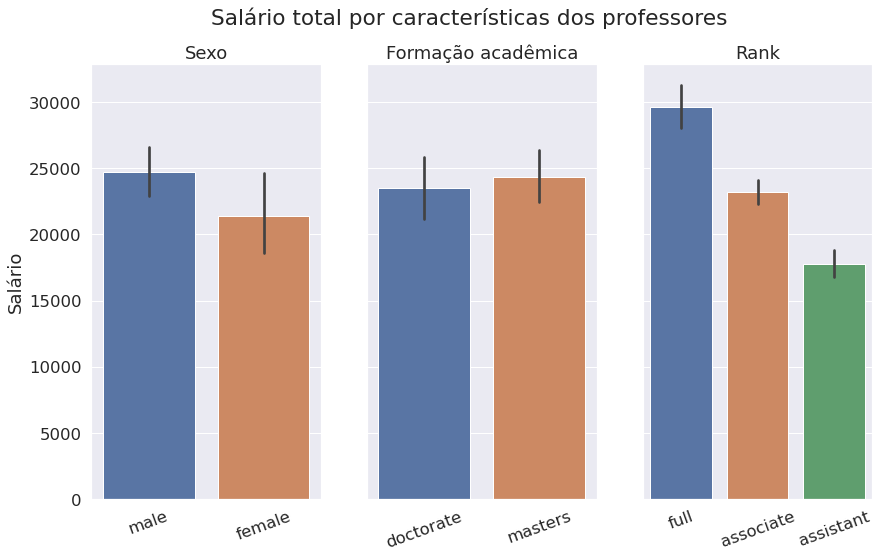

In [105]:
#Salário por características
fig, axes = plt.subplots(1, 3, figsize=(14, 8), sharey= True)
fig.suptitle('Salário total por características dos professores')

#Por sexo
axes[0].set_title('Sexo')
sns.barplot(data= df, x='sx', y= 'sl', ax=axes[0])
axes[0].set_ylabel('Salário'), axes[0].set_xlabel('')
axes[0].set_xticklabels(labels= ['male', 'female'], rotation=20)

#Por formação
axes[1].set_title('Formação acadêmica')
sns.barplot(data= df, x='dg', y= 'sl', ax=axes[1])
axes[1].set_ylabel(''), axes[1].set_xlabel('')
axes[1].set_xticklabels(labels= ['doctorate', 'masters'], rotation=20)

#Por rank
axes[2].set_title('Rank')
sns.barplot(data= df, x='rk', y= 'sl', ax=axes[2])
axes[2].set_ylabel(''), axes[2].set_xlabel('')
axes[2].set_xticklabels(labels= ['full', 'associate', 'assistant'], rotation=20);

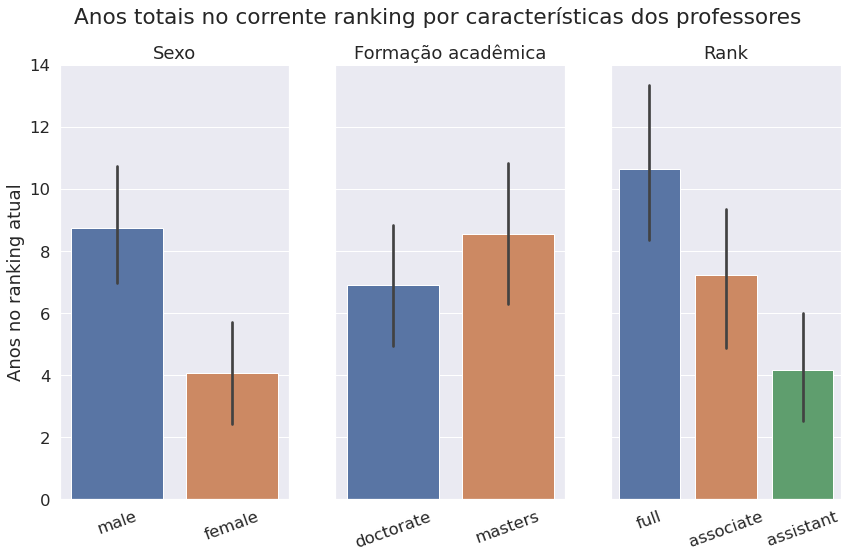

In [102]:
#Número de anos no corrente ranking por características dos professores
fig, axes = plt.subplots(1, 3, figsize=(14, 8), sharey= True)
fig.suptitle('Anos totais no corrente ranking por características dos professores')

#Por sexo
axes[0].set_title('Sexo')
sns.barplot(data= df, x='sx', y= 'yr', ax=axes[0])
axes[0].set_ylabel('Anos no ranking atual'), axes[0].set_xlabel('')
axes[0].set_xticklabels(labels= ['male', 'female'], rotation=20)

#Por formação
axes[1].set_title('Formação acadêmica')
sns.barplot(data= df, x='dg', y= 'yr', ax=axes[1])
axes[1].set_ylabel(''), axes[1].set_xlabel('')
axes[1].set_xticklabels(labels= ['doctorate', 'masters'], rotation=20)

#Por rank
axes[2].set_title('Rank')
sns.barplot(data= df, x='rk', y= 'yr', ax=axes[2])
axes[2].set_ylabel(''), axes[2].set_xlabel('')
axes[2].set_xticklabels(labels= ['full', 'associate', 'assistant'], rotation=20);

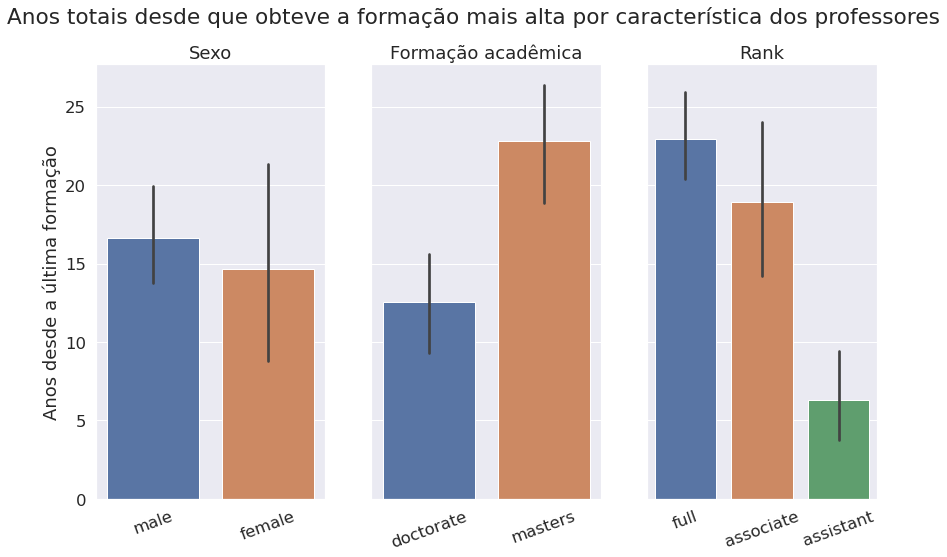

In [106]:
#Número de anos desde que obteve a formação mais alta por característica dos professores
fig, axes = plt.subplots(1, 3, figsize=(14, 8), sharey= True)
fig.suptitle('Anos totais desde que obteve a formação mais alta por característica dos professores')

#Por sexo
axes[0].set_title('Sexo')
sns.barplot(data= df, x='sx', y= 'yd', ax=axes[0])
axes[0].set_ylabel('Anos desde a última formação'), axes[0].set_xlabel('')
axes[0].set_xticklabels(labels= ['male', 'female'], rotation=20)

#Por formação
axes[1].set_title('Formação acadêmica')
sns.barplot(data= df, x='dg', y= 'yd', ax=axes[1])
axes[1].set_ylabel(''), axes[1].set_xlabel('')
axes[1].set_xticklabels(labels= ['doctorate', 'masters'], rotation=20)

#Por rank
axes[2].set_title('Rank')
sns.barplot(data= df, x='rk', y= 'yd', ax=axes[2])
axes[2].set_ylabel(''), axes[2].set_xlabel('')
axes[2].set_xticklabels(labels= ['full', 'associate', 'assistant'], rotation=20);

#### Exercício 2: Plote gráficos de violino para as distribuições de observações por sexo `sx`, rank `rk` e títulação `dg`. 

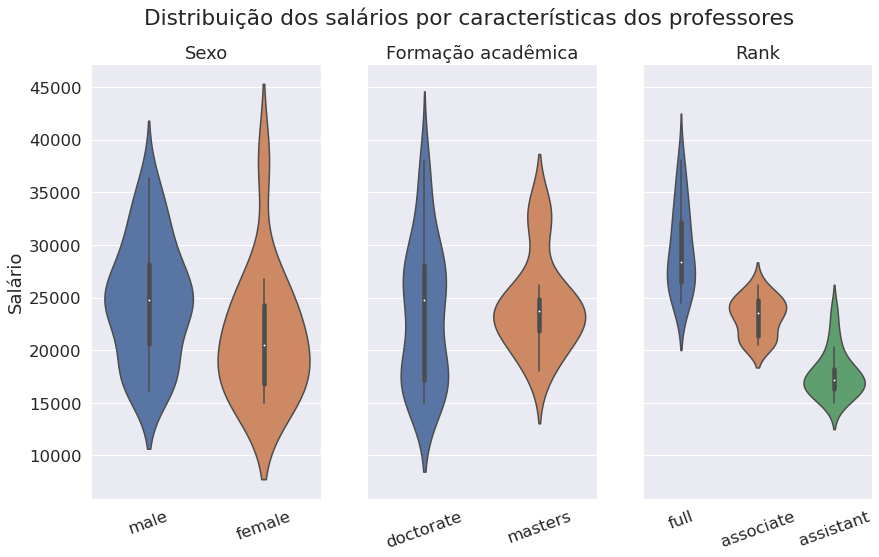

In [107]:
#Distribuição salarial por característica dos professores
fig, axes = plt.subplots(1, 3, figsize=(14, 8), sharey= True)
fig.suptitle('Distribuição dos salários por características dos professores')

#Por sexo
axes[0].set_title('Sexo')
sns.violinplot(data= df, x='sx', y= 'sl', ax=axes[0])
axes[0].set_ylabel('Salário'), axes[0].set_xlabel('')
axes[0].set_xticklabels(labels= ['male', 'female'], rotation=20)

#Por formação
axes[1].set_title('Formação acadêmica')
sns.violinplot(data= df, x='dg', y= 'sl', ax=axes[1])
axes[1].set_ylabel(''), axes[1].set_xlabel('')
axes[1].set_xticklabels(labels= ['doctorate', 'masters'], rotation=20)

#Por rank
axes[2].set_title('Rank')
sns.violinplot(data= df, x='rk', y= 'sl', ax=axes[2])
axes[2].set_ylabel(''), axes[2].set_xlabel('')
axes[2].set_xticklabels(labels= ['full', 'associate', 'assistant'], rotation=20);

#### Exercício3: Realize o processo de "dummização"das variáveis categóricas `sx`, `rk` e `dg`.

#### Exercício 4: Realize o ajuste do modelo de regressão linear para a previsão de `sl` usandos os atributos `['yr', 'yd']` como preditores, separe o dataset em conjuntos de treino e teste, realize o ajuste e teste a qualidade do modelo ao fim. Em seguida repita o processo usando a regularização `RidgeCV`, compare os resultados.

#### Exercício 5: Agora submeta o modelo a todos os atributos, a menos de `['sx', 'rk', 'dg', 'sl']` e repita a modelização.

#### Exercício 6: Repita a modelização do exercício 5 com a aplicação da regularização `RidgeCV`, imprima o coeficiente `alpha_` e discuta os resultados.

#### Exercício 7: Repita a modelização do exercício 5 com a aplicação da regularização `Lasso`, imprima o coeficiente `alpha_` e discuta os resultados.